<a href="https://colab.research.google.com/github/fatiamaresti/Classification_deploy/blob/main/Final_Notebook_Kevin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. **Introduction**

#### Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. EDA
  *   4.1 Univariate Analysis
    *   4.1.1 Continous Variable
    *   4.1.2 Categorical Variable
  *   4.2 Bivariate Analysis
    *   4.2.1 Label By Website & Telepon
    *   4.2.2 Label By SME Kelengkapan Data
    *   4.2.3 Label By Review Relevan
    *   4.2.4 Conclution of Bivariate Analysist

5. Classification
  *   5.1 Prepare Dataset for Modeling
  *   5.2 Classification Method
    *   5.2.1 Model Logistic Regression
    *   5.2.2 Model Decision Tree
    *   5.2.3 Model Random Forest
    *   5.2.4 Model Support Vector Classification
    *   5.2.5 Model Gaussian Naive Bayes
    *   5.2.6 Model Ada Boost Classification
    *   5.2.7 Model Gradient Boost Classification
    *   5.2.8 Model Stochastic Gradient Descent
  *   5.3 Model Evaluation
    


# **1. Import Packages**

In [1]:
!pip install --upgrade openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
sns.set_style


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<function seaborn.rcmod.set_style>

In [3]:
!pip3 install pandas

# **2. Load Dataset**

The dataset will be prepared through gdown

In [4]:
import gdown

In [5]:
!gdown https://drive.google.com/uc?id=1I956HdG7oN-2VEo-17CCNMaZcWEqf7ba

Downloading...
From: https://drive.google.com/uc?id=1I956HdG7oN-2VEo-17CCNMaZcWEqf7ba
To: /content/Master.xlsx
100% 1.35M/1.35M [00:00<00:00, 135MB/s]


# **3. Data Preparation**

Here, we will manipulate the data so that it will fit better in the model

Labeling is given by SME based on the requirements below and knowledge from data history of merchant GoFood

---

1. **Rating** Contains the overall rating of the Business/MSMEs out of 5 
2. **Total Reviews** Contains total number of rating for the MSMEs as of the above mentioned date
3. **Distance** Contains Business/MSME's distance to the nearest high school
4. **Check_Hp** Contains the yes or no of a phone number in the Business/MSME's  
5. **Check_Web** Contains the yes or no of a website number in the Business/MSME's  
6. **Review_Relevan** Contains total relevant reviews based on the algorithm that has been given by Google 
6. **Kelengkapan Data** Contains Fulfilled data value from SME generated from scraping

In [6]:
#df = pd.read_excel('E:/FREELANCE/Fastwork/klasifikasi kevin/Master.xlsx') #import dataset in jupyter notebook
df = pd.read_excel('Master.xlsx') #import dataset in google.colabs
df.head(5)

,Nama_Tempat,Alamat,Code_Plus,Location,Latitude,Longitude,Kategori,Wilayah,KodePos,Senin,Selasa,Rabu,Kamis,Jumat,Sabtu,Minggu,Rating,Total_Reviews,Review_Relevan,Website,Telepon,SME_Data,Nearest_School,Distance,Check_Web,Check_Telepon,Label
0,Raminten Kitchen,"Jl. Sabirin, Kotabaru, Kec. Gondokusuman, Kota...","698C+6R Kotabaru, Kota Yogyakarta, Daerah Isti...","-7.7844065, 110.3721107",-7.784407,110.372111,Restoran Jawa,Kota Yogyakarta,55224,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,4.3,9871,Sangat Terpenuhi,NaN,+62 877-3888-4008,Kurang Lengkap,SMAS STELLA DUCE 1,0.034237,No,Yes,Potential
1,Legend Coffee,"Jl. Abu Bakar Ali No.24-26, Kotabaru, Kec. Gon...","696F+P4 Kotabaru, Kota Yogyakarta, Daerah Isti...","-7.7881171, 110.3727807",-7.788117,110.372781,Restoran,Kota Yogyakarta,55224,09.00 - 00.00,09.00 - 00.00,09.00 - 00.00,09.00 - 00.00,09.00 - 00.00,09.00 - 00.00,09.00 - 00.00,4.4,9288,Sangat Terpenuhi,http://www.legendcoffeejogja.com/,+62 274 541290,Sempurna,SMAN 3 YOGYAKARTA,0.201196,Yes,Yes,Sangat Potential
2,Harris Hotel & Conventions Gubeng - Surabaya,"Jl. Bangka No.08-18, Gubeng, Kec. Gubeng, Kota...","PPGX+WQ Gubeng, Surabaya City, East Java, Indo...","-7.2726026,112.7490344",-7.272603,112.749034,Restaurant,"PQ9M+8X Manyar Sabrangan, Surabaya City, East ...",60281,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,Buka 24 Jam,4.5,9222,Sangat Terpenuhi,https://www.discoverasr.com/en/harris/indonesi...,031 5011100,Sempurna,SMAS GIKI 2,0.248499,Yes,Yes,Sangat Potential
3,Lulu Hypermarket & Department Store - Plaza Taman,"Plaza Taman Modern, Jl. Raya Bekasi No.24, Uju...","RW7X+6J Ujung Menteng, Kota Jakarta Timur, Dae...","-6.1869541,106.9490205",-6.186954,106.949021,Hipermarket,Kota Jakarta Timur,13960,09.00 - 21.00,09.00 - 21.00,09.00 - 21.00,09.00 - 21.00,09.00 - 21.00,09.00 - 21.00,09.00 - 21.00,4.5,9163,Sangat Terpenuhi,https://www.luluhypermarket.com/bh-id,+62 21 29844000,Sempurna,SMAS DIPONEGORO 2 JAKARTA,0.805086,Yes,Yes,Sangat Potential
4,Mie Baso Akung,"Jl. Lodaya No.123, Burangrang, Kec. Lengkong, ...","3J9G+63 Burangrang, Kota Bandung, Jawa Barat, ...","-6.9319848,107.6251674",-6.931985,107.625167,Restoran Bakso,Kota Bandung,40263,09.30 - 20.00,09.30 - 20.00,09.30 - 20.00,09.30 - 20.00,NaN,09.30 - 20.00,09.30 - 20.00,4.5,8830,Terpenuhi,NaN,+62 22 7314746,Sangat Kurang Lengkap,SMAS MUHAMMADIYAH 3 BANDUNG,0.140069,No,Yes,Potential


In [7]:
#Hanya memanggil column yang dibutuhkan
df = df[['Rating','Total_Reviews','Review_Relevan','SME_Data','Distance','Check_Web','Check_Telepon','Label']]
df = df.dropna()

In [8]:
df

,Rating,Total_Reviews,Review_Relevan,SME_Data,Distance,Check_Web,Check_Telepon,Label
0,4.3,9871,Sangat Terpenuhi,Kurang Lengkap,0.034237,No,Yes,Potential
1,4.4,9288,Sangat Terpenuhi,Sempurna,0.201196,Yes,Yes,Sangat Potential
2,4.5,9222,Sangat Terpenuhi,Sempurna,0.248499,Yes,Yes,Sangat Potential
3,4.5,9163,Sangat Terpenuhi,Sempurna,0.805086,Yes,Yes,Sangat Potential
4,4.5,8830,Terpenuhi,Sangat Kurang Lengkap,0.140069,No,Yes,Potential
...,...,...,...,...,...,...,...,...
5233,0.0,0,Kosong,Sangat Kurang Lengkap,7.434709,No,No,Tidak Potential
5234,0.0,0,Kosong,Sangat Kurang Lengkap,7.613547,No,Yes,Tidak Potential
5235,0.0,0,Kosong,Sangat Kurang Lengkap,8.149004,No,No,Tidak Potential
5236,0.0,0,Kosong,Sangat Kurang Lengkap,9.276120,No,No,Tidak Potential


In [9]:
#df.info() will gather how many rows of each column that contains a null and the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5238 entries, 0 to 5237
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          5238 non-null   float64
 1   Total_Reviews   5238 non-null   int64  
 2   Review_Relevan  5238 non-null   object 
 3   SME_Data        5238 non-null   object 
 4   Distance        5238 non-null   float64
 5   Check_Web       5238 non-null   object 
 6   Check_Telepon   5238 non-null   object 
 7   Label           5238 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 368.3+ KB


In [10]:
#.isnull().sum() used for knowing how many null in each column.
df.isnull().any()

Rating            False
Total_Reviews     False
Review_Relevan    False
SME_Data          False
Distance          False
Check_Web         False
Check_Telepon     False
Label             False
dtype: bool

In [11]:
pd.unique(df[['Rating']].values.ravel())
#.ravel()-->return 1D array with all the input-array elements

array([4.3, 4.4, 4.5, 4.6, 4.2, 4.1, 4.7, 3.8, 4. , 4.8, 2.3, 3.9, 3.6,
       3.7, 4.9, 2.9, 1.9, 5. , 3.5, 3.1, 2.8, 2.6, 3.3, 3.4, 2.7, 2.2,
       3.2, 3. , 2.5, 1.8, 2. , 1.7, 1. , 0. ])


*   Yes all Avg. rating values is in between 0 <= ratings <= 5

# **4. EDA**

## **4.1 Univariate Analysis**
Univariate Analysis is analyzing through singular column


### 4.1.1. Continous Variable

Fungsi otomatis menghitung **statistika deskriptif** untuk semua variabel kontinu. Dalam statistik ini nilai NaN otomatis dihilangkan. </p>

Akan ditampilkan:
<ul>
    <li>banyaknya observasi dalam variabel</li>
    <li>rataan</li>
    <li>standar deviasi (std)</li> 
    <li>nilai minimum</li>
    <li>IQR (Interquartile Range: 25%, 50% dan 75%)</li>
    <li>nilai maksimum</li>
<ul>

In [12]:
df.describe()

,Rating,Total_Reviews,Distance
count,5238.000000,5238.000000,5238.000000
mean,3.519645,296.379534,0.956106
std,1.819150,881.320082,1.082644
min,0.000000,0.000000,0.015588
25%,3.700000,1.000000,0.365166
50%,4.400000,15.000000,0.610671
75%,4.600000,140.750000,1.090513
max,5.000000,9871.000000,10.768379


#### **Bar Plot dan Scatter Plot**
Bar Plot digunakan pada data univariat untuk mengetahui distribusi data, ditunjukkan pada diagram di diagonal utama.

Scatter Plot digunakan untuk mengetahui hubungan linear 2 variabel, ditunjukkan pada diagram lainnya.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d3e2d1890>,
      dtype=object)

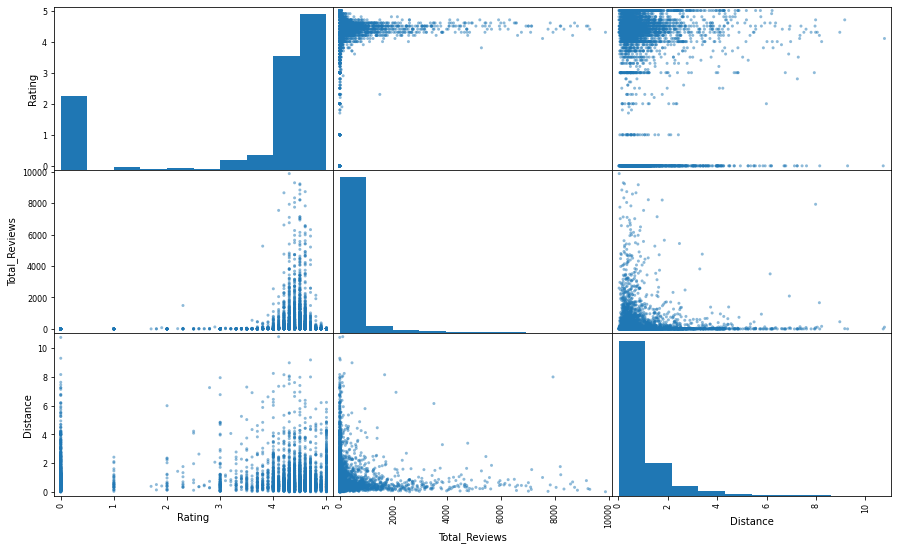

In [13]:
pd.plotting.scatter_matrix(df,figsize=(15,9))

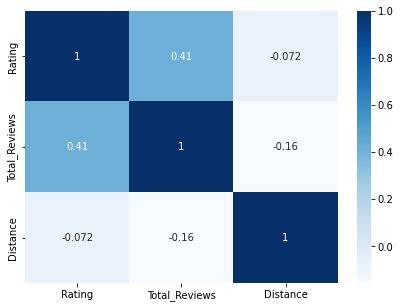

In [14]:
corr_all=df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches

sns.heatmap(corr_all, cmap="Blues", annot=True,ax=ax)

##### **Boxplot Graph**
Boxplot graph is used to know the outliers of each column

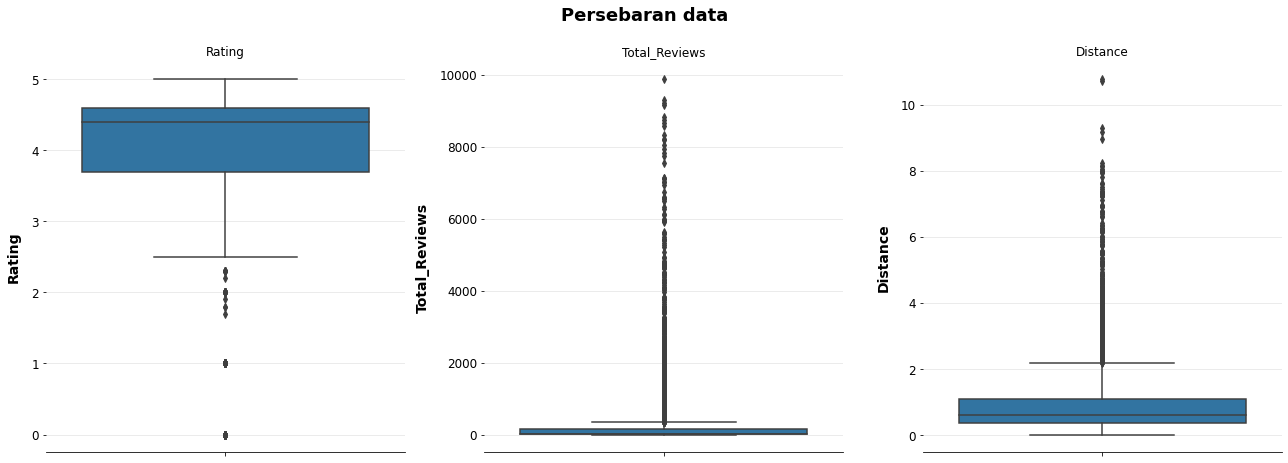

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, y="Rating", ax=ax[0])
sns.boxplot(data=df, y="Total_Reviews", ax=ax[1])
sns.boxplot(data=df, y="Distance", ax=ax[2])

col = ["Rating", "Total_Reviews", "Distance"]
for i in range(3) : 
    ax[i].grid(axis='y', alpha=0.3,)
    ax[i].set_axisbelow(True)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(col[i])
    ax[i].tick_params(labelsize=12)
    ax[i].set_ylabel(col[i], fontsize=14, labelpad=10, fontweight='bold')


plt.suptitle("Persebaran data\n", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

Dari ketiga variabel kontinu yaitu Rating, Total_Reviews, dan Distance diperoleh informasi bahwa :

- Rata-rata rating sebesar 3.5, Total Review adalah 296.379, dan Distance sebesar 0.956
- Dari bar plot diperoleh bahwa nilai Distance menumpuk pada rentang [0,1), Rating paling banyak pada selang (4.5,5], dan Total_Reviews yang menumpuk pada rentang [0,1000)
- Dari bar plot juga terlihat bahwa distribusi Distance dan Total_Reviews menceng ke kanan artinya data menumpuk di nilai yang kecil dan distribusi Rating menceng ke kiri artinya data menumpuk di nilai yang besar
- Dari scatter plot diperoleh hubungan 2 variabel antara Distance, Total_Reviews, dan Rating tidak ada yang memiliki hubungan linear. Hubungan linear variabel Total_Reviews dan Rating cenderung positif, serta Total_Reviews dan Distance cenderung berhubungan linear negatif, sedangkan variabel Distance dan Rating tidak memiliki hubungan linear.
- Dalam boxplot dapat dilihat bahwa ketiga variabel memiliki nilai pencilan yang ekstrem, terutama pada variabel Total_Reviews. Namun nilai pencilan tidak dihapus karena akan menghilangkan esensi data asli dan berdampak pada identifikasi label dan point SME

### 4.1.2. Categorical Variable

Gunakan metode "describe" pada variabel tipe 'object' / kategorikal. Sehingga fungsi mengeluarkan statistik : </p>

<ul>
    <li>banyaknya observasi dalam variabel</li>
    <li>banyaknya kategori unik</li>
    <li>kategori yang paling sering muncul</li> 
    <li>frekuensi dari top kategori</li>
<ul>

In [16]:
df.describe(include=['object'])

,Review_Relevan,SME_Data,Check_Web,Check_Telepon,Label
count,5238,5238,5238,5238,5238
unique,3,3,2,2,3
top,Kosong,Sangat Kurang Lengkap,No,Yes,Potential
freq,3207,1958,3670,3953,1976


#### **Label Distribution**
untuk variabel kategorikal Review_Relevan, SME_Data, Check_Web, dan Check_Telepon

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

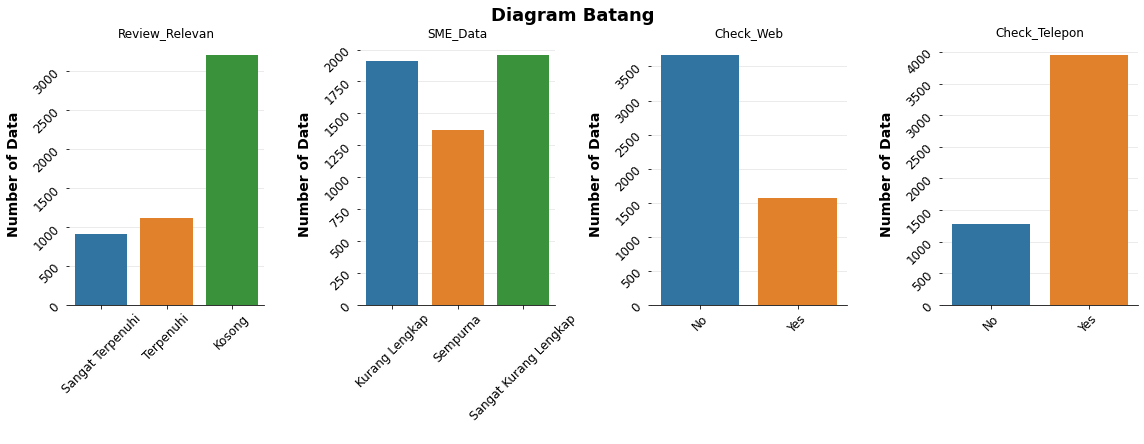

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

sns.countplot(df.Review_Relevan, ax=ax[0])
sns.countplot(df.SME_Data, ax=ax[1])
sns.countplot(df.Check_Web, ax=ax[2])#, palette='viridis')
sns.countplot(df.Check_Telepon, order=["No","Yes"], ax=ax[3])#, palette='viridis')
col = ["Review_Relevan", "SME_Data", "Check_Web", "Check_Telepon"]
for i in range(4) : 
    ax[i].grid(axis='y', alpha=0.3,)
    ax[i].set_axisbelow(True)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(col[i])
    ax[i].tick_params(labelsize=12)
    ax[i].set_ylabel("Number of Data", fontsize=14, labelpad=10, fontweight='bold')
    ax[i].set_xlabel(" ")
    ax[i].tick_params(labelrotation=45)
plt.suptitle("Diagram Batang\n", ha='center', x=0.5, y=1.02, 
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

Dari diagram batang di atas diperoleh bahwa : 
- Review_Relevan paling banyak berisi kategori "Kosong" sebanyak 3207 data
- Variabel SME_Data memiliki kategori paling banyak berisi "Sangat Kurang Lengkap" sebanyak 1958
- Variabel Check_Web didominasi kategori No atau sebagian besar tempat tidak memiliki website sebanyak 3670
- Sedangkan variabel Check_Telepon didominasi kategori Yes atau sebagian besar tempat memiliki no telepon sebanyak 3953

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


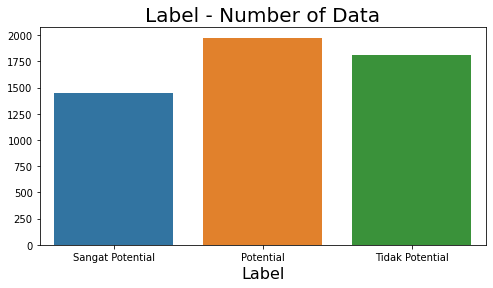

In [18]:
# Final Grade Countplot
df['Label'].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(df.Label, order=["Sangat Potential","Potential","Tidak Potential"])
plt.title('Label - Number of Data',fontsize=20)
plt.xlabel('Label', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

In [19]:
df['Label'].value_counts()

Potential           1976
Tidak Potential     1815
Sangat Potential    1447
Name: Label, dtype: int64

Dari variabel target Label dapat dilihat persebaran kategori cenderung merata dengan kategori terbanyak adalah "Potential" sebanyak 1976 data. Persebaran kategori yang merata membantu menciptakan model dengan akurasi lebih baik.

## **4.2 Bivariate Analysis**
Bivariate Analysis menganalisis hubungan antara 2 variabel. Akan dianalisis hubungan masing-masing variabel Review_Relevan, SME_Data, Check_Web, Check_Telepon dengan variabel Label menggunakan bar plot dan uji chi-square. Sehingga diperoleh variabel yang signifikan berpengaruh terhadap variabel target Label.

### **4.2.1. Label By Website & Telepon**
see how label in have a Website & Telepon vs those not have 

In [20]:
# Website status
perc = (lambda col: col/col.sum())
index = ['Sangat Potential','Potential','Tidak Potential']
website_tab1 = pd.crosstab(index=df.Label, columns=df.Check_Web)
website_tab = np.log(website_tab1)
website_perc = website_tab.apply(perc).reindex(index)

# Telepon Status
telepon_tab1 = pd.crosstab(index=df.Label, columns=df.Check_Telepon)
telepon_tab = np.log(telepon_tab1)
telepon_perc = telepon_tab.apply(perc).reindex(index)

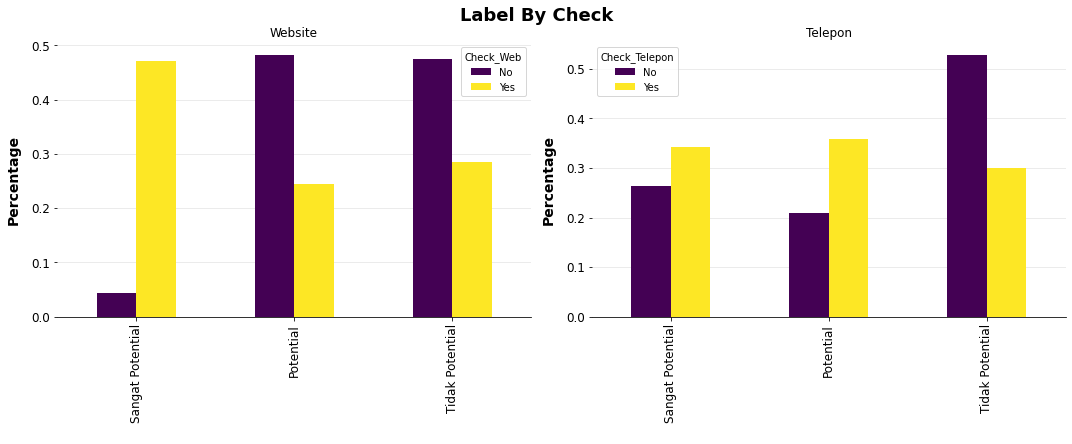

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
website_perc.plot.bar(colormap="viridis", fontsize=16, ax=ax[0])
telepon_perc.plot.bar(colormap="viridis", fontsize=16, ax=ax[1])
col = ["Website", "Telepon"]
for i in range(2) : 
    ax[i].grid(axis='y', alpha=0.3,)
    ax[i].set_axisbelow(True)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(col[i])
    ax[i].tick_params(labelsize=12)
    ax[i].set_ylabel("Percentage", fontsize=14, labelpad=10, fontweight='bold')
    ax[i].set_xlabel(" ")
plt.suptitle("Label By Check\n", ha='center', x=0.5, y=1.02, 
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

Dari diagram di atas diperoleh informasi bahwa :
- **Website** : Tempat yang termasuk dalam kategori Sangat Potensial secara signifikan lebih banyak memiliki website dari pada yang tidak memiliki website, sedangkan tempat yang tidak memiliki website berpeluang besar masuk dalam kategori Potensial dan Tidak Potensial. Sehingga **tempat yang memiliki website menyebabkan label semakin potensial**
- **Telepon** : Tempat dengan kategori Tidak Potensial sebagian besar tidak memiliki no Telepon, dan tempat dengan kategori Sangat Potensial dan Potensial mayoritas memiliki no Telepon. Sehingga **tempat yang memiliki no telepon menyebabkan label semakin potensial**

#### Hyphothesis Testing confirmed, website & telepon status has a significant correlation with Label.

In [22]:
# chi-square test result -- GOOD!
website_table = sm.stats.Table(website_tab1)
website_rslt = website_table.test_nominal_association()
website_rslt.pvalue

0.0

Hasil uji chi-square di atas menunjukkan hubungan antara variabel label dan website. Diperoleh nilai pvalue=0 < alpha=0.05, artinya **ada hubungan yang signifikan antara variabel label dan website**.

In [23]:
# chi-square test result -- GOOD!
telepon_table = sm.stats.Table(telepon_tab1)
telepon_rslt = telepon_table.test_nominal_association()
telepon_rslt.pvalue

0.0

Hasil uji chi-square di atas menunjukkan hubungan antara variabel label dan telepon. Diperoleh nilai pvalue=0 < alpha=0.05, artinya **ada hubungan yang signifikan antara variabel label dan telepon**.

### **4.2.2. Label By SME Kelengkapan Data**
see how SME Kelengkapan Data influence label perfomance 

Text(0.5, 0, 'Label')

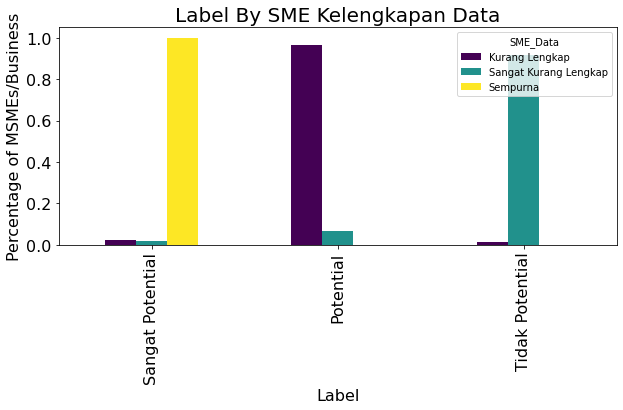

In [24]:
SME_tab = pd.crosstab(index=df.Label, columns=df.SME_Data)
SME_perc = SME_tab.apply(perc).reindex(index)

SME_perc.plot.bar(colormap="viridis", fontsize=16, figsize=(10,4))
plt.title('Label By SME Kelengkapan Data', fontsize=20)
plt.ylabel('Percentage of MSMEs/Business', fontsize=16)
plt.xlabel('Label', fontsize=16)

Dari diagram di atas diperoleh informasi bahwa :
- SME_Data yang sempurna sebagian besar masuk pada label Sangat Potensial
- SME_Data yang kurang lengkap sebagian besar masuk pada label Potensial
- SME_Data yang Sangat Kurang Lengkap sebagian besar masuk pada label Tidak Potensial
- Sehingga dapat disimpulkan bahwa **semakin lengkap SME_Data menyebabkan Label semakin potensial**

In [25]:
# chi-square test result -- GOOD!
SME_table = sm.stats.Table(SME_tab)
SME_rslt = SME_table.test_nominal_association()
SME_rslt.pvalue

0.0

Hasil uji chi-square di atas menunjukkan hubungan antara variabel label dan SME_Data. Diperoleh nilai pvalue=0 < alpha=0.05, artinya **ada hubungan yang signifikan antara variabel label dan SME_Data**.

### **4.2.3. Label By Review Relevan**
see how review relevan influence label perfomance 

In [26]:
Review_Relevan_tab1 = pd.crosstab(index=df.Label, columns=df.Review_Relevan)
Review_Relevan_perc = Review_Relevan_tab1.apply(perc).reindex(index)

Text(0.5, 0, 'Label')

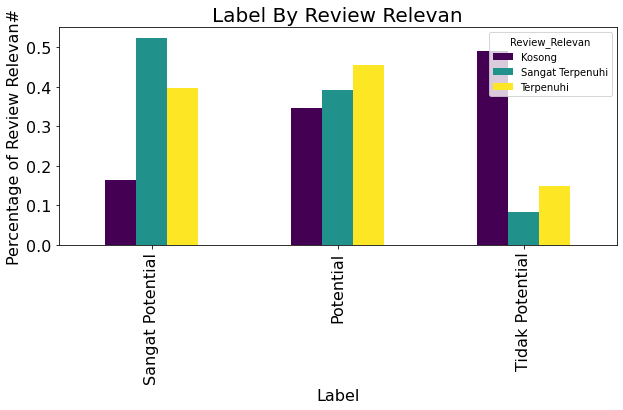

In [27]:
Review_Relevan_perc.plot.bar(colormap="viridis", fontsize=16, figsize=(10,4))
plt.title('Label By Review Relevan', fontsize=20)
plt.ylabel('Percentage of Review Relevan#', fontsize=16)
plt.xlabel('Label', fontsize=16)

Dari diagram di atas diperoleh informasi bahwa :
- Secara umum persebaran kategori Review_Relevan cenderung seimbang untuk setiap Label
- Untuk label Sangat Potensial didominasi Review_Relevan yang Sangat Terpenuhi
- Untuk label Potensial cenderung seimbang antara Review_Relevan Sangat Terpenuhi dan Terpenuhi
- Sedangkan label Tidak Potensial didominasi Review_Relevan Kosong

In [28]:
# chi-square test result -- Good!
Review_Relevan_table = sm.stats.Table(Review_Relevan_tab1)
Review_Relevan_rslt = Review_Relevan_table.test_nominal_association()
Review_Relevan_rslt.pvalue

0.0

Hasil uji chi-square di atas menunjukkan hubungan antara variabel label dan Review_Relevan. Diperoleh nilai pvalue=0 < alpha=0.05, artinya ada hubungan yang signifikan antara variabel label dan Review_Relevan.

### **4.2.4. Conclution of Bivariate Analysist**
Dari 4 variabel Review_Relevan, SME_Data, Check_Web, dan Check_Telepon dilakukan uji chi-square terhadap variabel target Label. Bahwa Variabel Review_Relevan, SME_Data, Check_Web, dan Check_Telepon memiliki pengaruh signifikan terhadap variabel target Label.

# **5. Classification**
### Use Google Maps Data Organization Information To Predict Their Potential

## 5.1 Prepare Dataset for Modeling


In [29]:
# create dataframe dfd for classification
#clean_df = df.copy()
clean_df = df
clean_df.head(5)

,Rating,Total_Reviews,Review_Relevan,SME_Data,Distance,Check_Web,Check_Telepon,Label
0,4.3,9871,Sangat Terpenuhi,Kurang Lengkap,0.034237,No,Yes,Potential
1,4.4,9288,Sangat Terpenuhi,Sempurna,0.201196,Yes,Yes,Sangat Potential
2,4.5,9222,Sangat Terpenuhi,Sempurna,0.248499,Yes,Yes,Sangat Potential
3,4.5,9163,Sangat Terpenuhi,Sempurna,0.805086,Yes,Yes,Sangat Potential
4,4.5,8830,Terpenuhi,Sangat Kurang Lengkap,0.140069,No,Yes,Potential


In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5238 entries, 0 to 5237
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          5238 non-null   float64
 1   Total_Reviews   5238 non-null   int64  
 2   Review_Relevan  5238 non-null   object 
 3   SME_Data        5238 non-null   object 
 4   Distance        5238 non-null   float64
 5   Check_Web       5238 non-null   object 
 6   Check_Telepon   5238 non-null   object 
 7   Label           5238 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 497.3+ KB


In [52]:
# replacing values from categorical to numeric
clean_df['SME_Data'].replace(['Sangat Kurang Lengkap','Kurang Lengkap','Sempurna'],[0,1,2], inplace=True)
clean_df['Review_Relevan'].replace(['Kosong','Terpenuhi','Sangat Terpenuhi'],[0,1,2], inplace=True)
clean_df['Check_Web'].replace(['No','Yes'],[0,1], inplace=True)
clean_df['Check_Telepon'].replace(['No','Yes'],[0,1], inplace=True)
clean_df['Label'].replace(['Tidak Potential','Potential','Sangat Potential'],[0,1,2], inplace=True)
clean_df.head(6)

,Rating,Total_Reviews,Review_Relevan,SME_Data,Distance,Check_Web,Check_Telepon,Label
0,4.3,9871,2,1,0.034237,0,1,1
1,4.4,9288,2,2,0.201196,1,1,2
2,4.5,9222,2,2,0.248499,1,1,2
3,4.5,9163,2,2,0.805086,1,1,2
4,4.5,8830,1,0,0.140069,0,1,1
5,4.6,8724,1,2,0.338992,1,1,2


Text(0.5, 1.0, 'Correlation Heatmap')

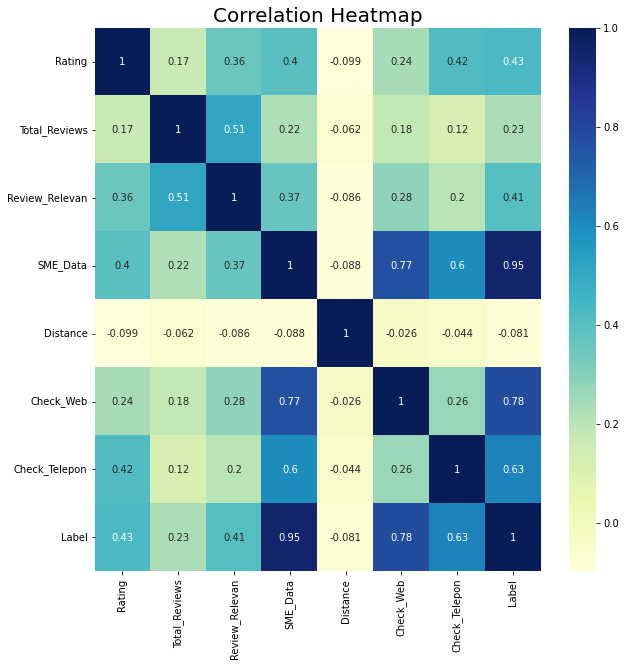

In [32]:
# see correlation between variables through a correlation heatmap
corr = clean_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=20)

In [33]:
#Save clean_df dataframe to csv file
clean_df.to_csv('clean_Master.csv')

In [34]:
clean_df.describe()

,Rating,Total_Reviews,Review_Relevan,SME_Data,Distance,Check_Web,Check_Telepon,Label
count,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000
mean,3.519645,296.379534,0.561474,0.887362,0.956106,0.299351,0.754677,0.929744
std,1.819150,881.320082,0.770581,0.788927,1.082644,0.458017,0.430319,0.786091
min,0.000000,0.000000,0.000000,0.000000,0.015588,0.000000,0.000000,0.000000
25%,3.700000,1.000000,0.000000,0.000000,0.365166,0.000000,1.000000,0.000000
50%,4.400000,15.000000,0.000000,1.000000,0.610671,0.000000,1.000000,1.000000
75%,4.600000,140.750000,1.000000,2.000000,1.090513,1.000000,1.000000,2.000000
max,5.000000,9871.000000,2.000000,2.000000,10.768379,1.000000,1.000000,2.000000


In [35]:
clean_df['Label'].value_counts()

1    1976
0    1815
2    1447
Name: Label, dtype: int64

In [36]:
#SPLITTING DATASET
# Predictor dan target
X = clean_df.drop('Label', axis = 1)
y = clean_df['Label']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, 'sedangkan jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Label di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, 'sedangkan jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Label di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4190, 7) sedangkan jumlah baris dan kolom dari y_train adalah: (4190,)
Persentase Label di data Training adalah:
1    0.378282
0    0.346778
2    0.274940
Name: Label, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (1048, 7) sedangkan jumlah baris dan kolom dari y_test adalah: (1048,)
Persentase Label di data Testing adalah:
1    0.373092
0    0.345420
2    0.281489
Name: Label, dtype: float64


## 5.2 Classification Method

### 5.2.1 **Model Logistic Regression**

In [37]:
#PEMBUATAN MODEL
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train,y_train)

#PERFORMANSI MODEL TRAINING
# Predict
y_test_pred = log_model.predict(x_test)
#PERFORMANSI MODEL
# score
print("Random Forest Model Score" , ":" , log_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , log_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test,y_test_pred))

Random Forest Model Score : 0.9391408114558473 Cross Validation Score : 0.9322519083969466
Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       362
           1       0.91      0.95      0.93       391
           2       0.95      0.97      0.96       295

    accuracy                           0.93      1048
   macro avg       0.93      0.93      0.93      1048
weighted avg       0.93      0.93      0.93      1048



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


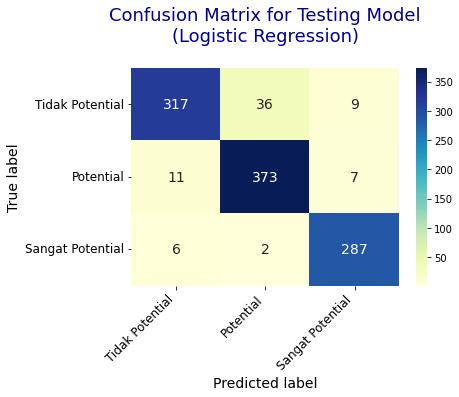

In [38]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

# Plot confusion matrix
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### 5.2.2 **Model Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
#Train the model
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
# Predict
y_test_pred = tree_model.predict(x_test)
# Performansi model
# score
print("Decision Tree Model Score" , ":" , tree_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , tree_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test,y_test_pred))

Decision Tree Model Score : 1.0 Cross Validation Score : 0.9923664122137404
Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       362
           1       0.99      0.99      0.99       391
           2       0.99      1.00      0.99       295

    accuracy                           0.99      1048
   macro avg       0.99      0.99      0.99      1048
weighted avg       0.99      0.99      0.99      1048



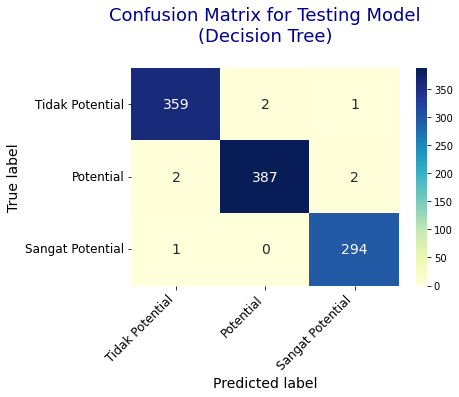

In [40]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Decision Tree)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

### 5.2.3 **Model Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rfc_model = RandomForestClassifier().fit(x_train,y_train)
# Predict
y_test_pred = rfc_model.predict(x_test)
# Performansi model
# score
print("Random Forest Model Score" , ":" , rfc_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , rfc_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Random Forest) :')
print(classification_report(y_test,y_test_pred))

Random Forest Model Score : 1.0 Cross Validation Score : 0.9942748091603053
Classification Report Testing Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       362
           1       1.00      0.99      0.99       391
           2       0.99      1.00      0.99       295

    accuracy                           0.99      1048
   macro avg       0.99      0.99      0.99      1048
weighted avg       0.99      0.99      0.99      1048



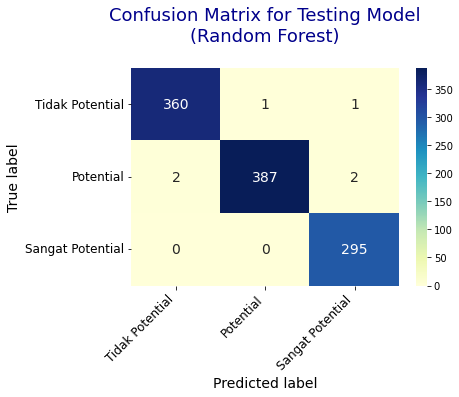

In [42]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

### 5.2.4 **Model Support Vector Classification**

In [43]:
from sklearn.svm import SVC
#Train the model
svc_model = SVC().fit(x_train,y_train)
# Predict
y_test_pred = svc_model.predict(x_test)
# Performansi model
# score
print("Support Vector Classification Model Score" , ":" , svc_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , svc_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Support Vector Classification) :')
print(classification_report(y_test,y_test_pred))

Support Vector Classification Model Score : 0.4630071599045346 Cross Validation Score : 0.46564885496183206
Classification Report Testing Model (Support Vector Classification) :
              precision    recall  f1-score   support

           0       0.45      0.88      0.60       362
           1       0.45      0.19      0.27       391
           2       0.55      0.32      0.41       295

    accuracy                           0.47      1048
   macro avg       0.48      0.46      0.42      1048
weighted avg       0.48      0.47      0.42      1048



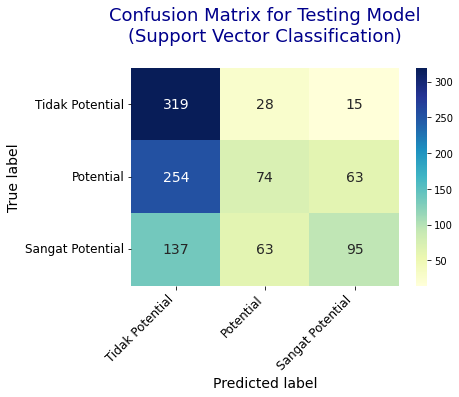

In [44]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Support Vector Classification)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

### 5.2.5 **Model Gaussian Naive Bayes**

In [45]:
from sklearn.naive_bayes import GaussianNB
#Train the model
gnb_model = GaussianNB().fit(x_train,y_train)
# Predict
y_test_pred = gnb_model.predict(x_test)
# Performansi model
# score
print("Gaussian Naive Bayes Score" , ":" , gnb_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , gnb_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Gaussian Naive Bayes) :')
print(classification_report(y_test,y_test_pred))

Gaussian Naive Bayes Score : 0.9601431980906922 Cross Validation Score : 0.9666030534351145
Classification Report Testing Model (Gaussian Naive Bayes) :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       362
           1       0.99      0.94      0.96       391
           2       0.96      0.98      0.97       295

    accuracy                           0.97      1048
   macro avg       0.97      0.97      0.97      1048
weighted avg       0.97      0.97      0.97      1048



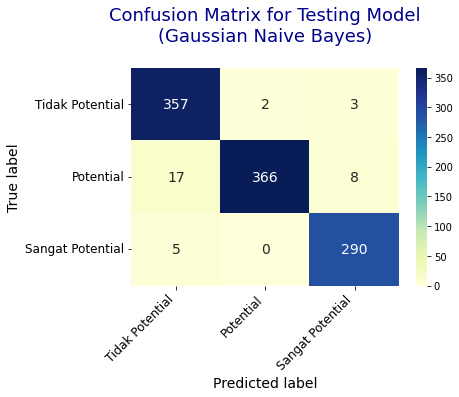

In [46]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

### 5.2.6 **Model Gradient Boost Classification**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbc_model = GradientBoostingClassifier().fit(x_train,y_train)
# Predict
y_test_pred = gbc_model.predict(x_test)
# Performansi model
# score
print("Gradient Boost Classification Score" , ":" , gbc_model.score(x_train, y_train),
      "Cross Validation Score" ,":" , gbc_model.score(x_test, y_test))
# classification report 
print('Classification Report Testing Model (Gradient Boost Classification) :')
print(classification_report(y_test,y_test_pred))

Gradient Boost Classification Score : 1.0 Cross Validation Score : 0.9933206106870229
Classification Report Testing Model (Gradient Boost Classification) :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       362
           1       1.00      0.99      0.99       391
           2       0.99      1.00      0.99       295

    accuracy                           0.99      1048
   macro avg       0.99      0.99      0.99      1048
weighted avg       0.99      0.99      0.99      1048



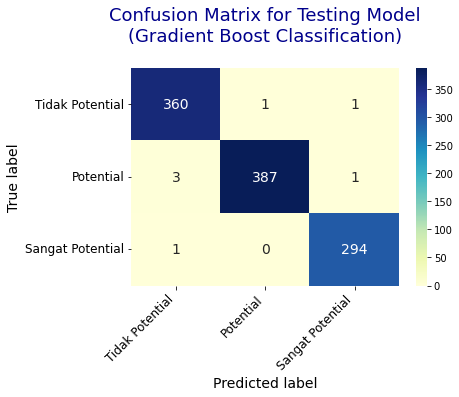

In [48]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('Tidak Potential','Potential','Sangat Potential'), 
                                   ('Tidak Potential','Potential','Sangat Potential'))

plt.figure(figsize=(6,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('Confusion Matrix for Testing Model\n(Gradient Boost Classification)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## 5.3 Model Evaluation

In [49]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest','Support Vector Classification', 
               'Gaussian Naive Bayes', 'Gradient Boost Classification'],
    'Score' : [log_model.score(x_train, y_train), tree_model.score(x_train, y_train), 
               rfc_model.score(x_train, y_train), svc_model.score(x_train, y_train),
               gnb_model.score(x_train, y_train), gbc_model.score(x_train, y_train)],
    'Cross Validation' : [log_model.score(x_test, y_test), tree_model.score(x_test, y_test), 
               rfc_model.score(x_test, y_test), svc_model.score(x_test, y_test),
               gnb_model.score(x_test, y_test), gbc_model.score(x_test, y_test)]})

models.sort_values(by = 'Cross Validation', ascending = False)
#models

,Model,Score,Cross Validation
2,Random Forest,1.000000,0.994275
5,Gradient Boost Classification,1.000000,0.993321
1,Decision Tree,1.000000,0.992366
4,Gaussian Naive Bayes,0.960143,0.966603
0,Logistic Regression,0.939141,0.932252
3,Support Vector Classification,0.463007,0.465649


Dari perbandingan 8 metode klasifikasi di atas diperoleh bahwa 3 model dengan score Cross Validation tertinggi yaitu berturut-turut sebesar 0.994, 0.993, 0.992 adalah **Random Forest**, **Gradient Boost Classification**, dan **Decision Tree**

# 6. Deployment

### **Prediksi model dengan metode Random Forest**

In [50]:
# membuat dictionary label
label = ['Tidak Potential','Potential','Sangat Potential']
labeldic = dict() 
for index,value in enumerate(label):
  labeldic[index] = value

# input berupa nilai numerik [[Rating, Total_Reviews, SME_Data, Distance, Check_Web, Check_Telepon]]
input = [[3, 1000, 1, 1, 0.5, 0, 1]] #MASUKKAN NILAI INPUT DI SINI
predict = int(rfc_model.predict(input))

print('Prediksi klasifikasi Label dari input \n[[Rating, Total_Reviews, Review_Relvan, SME_Data, Distance, Check_Web, Check_Telepon]] = ', 
      input, '\nadalah kategori', labeldic[predict])

Prediksi klasifikasi Label dari input 
[[Rating, Total_Reviews, Review_Relvan, SME_Data, Distance, Check_Web, Check_Telepon]] =  [[3, 1000, 1, 1, 0.5, 0, 1]] 
adalah kategori Potential


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
